# TimeMoE Usage Example

## Loading TimeMoE Model

In [1]:
import numpy as np
import os
import sys

src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.insert(0, src_path)
print(f"src_path: {src_path}")

from samay.model import TimeMoEModel
from samay.dataset import TimeMoEDataset
from samay.utils import load_args

arg_path = "../config/timemoe.json"
args = load_args(arg_path)
tme = TimeMoEModel(**args)

src_path: /nethome/sli999/Samay/src


/nethome/sli999/anaconda3/envs/torch/lib/python3.11/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(
/nethome/sli999/anaconda3/envs/torch/lib/python3.11/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


## Define the datasets

In [2]:
train_dataset = TimeMoEDataset(name="ett", datetime_col='date', path='../data/data/ETTh1.csv', 
                             mode='train', batch_size=32, context_len=512, horizon_len=96, task_name="finetune")
val_dataset = TimeMoEDataset(name="ett", datetime_col='date', path='../data/data/ETTh1.csv',
                             mode='test', batch_size=128, context_len=512, horizon_len=96)

## Evaluate the zero-shot forecasting

In [3]:
metrics = tme.evaluate(val_dataset)
print(metrics)

{'mse': 0.47828728, 'mae': 0.45220655, 'mase': 1.5621544, 'mape': -0.19009934, 'rmse': 0.69158316, 'nrmse': 0.07268840430471468, 'smape': 0.7727101, 'msis': 0.069919765, 'nd': 20.229612437546262}


## Visualization of the evaluation

(462, 7, 512)


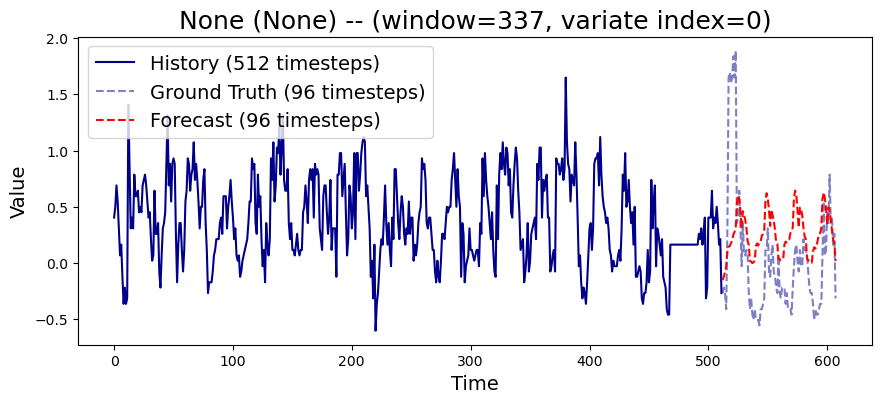

In [4]:
tme.plot(val_dataset)

## Finetune the Model

In [5]:
tme.finetune(train_dataset)

/nethome/sli999/anaconda3/envs/torch/lib/python3.11/site-packages/torch/nn/modules/loss.py:1100: UserWarning: Using a target size (torch.Size([32, 1, 1])) that is different to the input size (torch.Size([32, 512, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.huber_loss(input, target, reduction=self.reduction, delta=self.delta)
/nethome/sli999/anaconda3/envs/torch/lib/python3.11/site-packages/torch/nn/modules/loss.py:1100: UserWarning: Using a target size (torch.Size([32, 1, 8, 1])) that is different to the input size (torch.Size([32, 512, 8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.huber_loss(input, target, reduction=self.reduction, delta=self.delta)
/nethome/sli999/anaconda3/envs/torch/lib/python3.11/site-packages/torch/nn/modules/loss.py:1100: UserWarning: Using a target size (torch.Size([32, 1, 32, 1])) that is different to the inpu

/nethome/sli999/anaconda3/envs/torch/lib/python3.11/site-packages/torch/nn/modules/loss.py:1100: UserWarning: Using a target size (torch.Size([13, 1, 1])) that is different to the input size (torch.Size([13, 512, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.huber_loss(input, target, reduction=self.reduction, delta=self.delta)
/nethome/sli999/anaconda3/envs/torch/lib/python3.11/site-packages/torch/nn/modules/loss.py:1100: UserWarning: Using a target size (torch.Size([13, 1, 8, 1])) that is different to the input size (torch.Size([13, 512, 8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.huber_loss(input, target, reduction=self.reduction, delta=self.delta)
/nethome/sli999/anaconda3/envs/torch/lib/python3.11/site-packages/torch/nn/modules/loss.py:1100: UserWarning: Using a target size (torch.Size([13, 1, 32, 1])) that is different to the inpu

Epoch 0, Loss: 0.1356
Epoch 1, Loss: 0.1170
Epoch 2, Loss: 0.1028
Epoch 3, Loss: 0.0947
Epoch 4, Loss: 0.0839


## Evaluate the Finetuned Model

In [6]:
metrics = tme.evaluate(val_dataset)
print(metrics)

{'mse': 1.3270599, 'mae': 0.86829454, 'mase': 2.9995377, 'mape': 0.10158511, 'rmse': 1.1519809, 'nrmse': 0.1210782115435668, 'smape': 1.8951176, 'msis': 0.12658486, 'nd': 38.843448613719595}
